In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment4.ipynb")

# Clustering in Practice and K-Means Clustering

Please complete the following assignment. Run all cells and submit your completed notebook through Gradescope.

- Clustering is a fundamental unsupervised learning technique used to group similar data points based on their features. It helps in discovering patterns and structures within datasets without predefined labels.

- The k-means algorithm aims to partition a dataset into k clusters, assigning each data point to the cluster whose centroid is closest to that point.

#### In this assignment, the aim is to test your fundamentals of Clustering, specifically K-Means clustering.


<!-- BEGIN QUESTION -->

#### 1. Which of the following statements about k-means clustering is true?
    A) k-means clustering can only be used for categorical data.

    B) k-means clustering aims to minimize the within-cluster sum of squares.

    C) The k-means algorithm always converges to the global optimum.

    D) k-means clustering is a hierarchical clustering algorithm.

In [2]:
def ans1():
    return "B"

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 2. What is the main advantage of using the k-means++ initialization method over the standard k-means initialization?

    A) It selects initial centroids that are maximally distant from each other, ensuring convergence to the global optimum.

    B) It reduces the computational complexity of k-means from quadratic to linear time with respect to the number of data points.

    C) It allows k-means clustering to automatically determine the optimal number of clusters without prior specification.

    D) It probabilistically selects initial centroids based on data density, leading to faster convergence and improved clustering results.

In [3]:
def ans2():
    return "D"

<!-- END QUESTION -->

#### 3. Clustering on Synthetic Blob Data
- In this question, you are given a synthetic dataset generated using the `make_blobs` sklearn dataset method. 
- You're required to apply K-Means clustering on this data and plot the clustered dataset, marking the cluster centers.
- Use `k = 3`
- Return the **centers, clustered data point labels (classes), and the WCSS**
- `Please use random_state = 42 while defining the KMeans model`

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
def ans3():
    X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
    # Apply k-means
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    # plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100)
    # plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
    # plt.title('Cluster Visualization')
    # plt.xlabel('Feature 1')
    # plt.ylabel('Feature 2')
    # plt.show()
    return centroids, labels, kmeans.inertia_

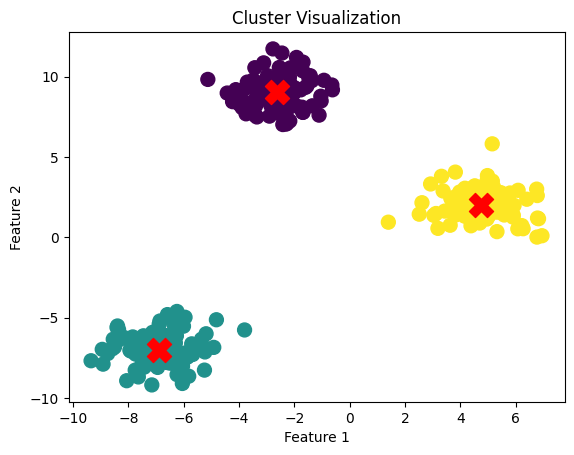

In [5]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
# Apply k-means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [6]:
grader.check("q3")

q3 results: All test cases passed!

#### 4. Clustering on funky-looking data
- In this question, you are given a synthetic dataset (anisotropic) generated using the `make_circles` sklearn dataset method. 
- You're required to apply K-Means clustering on this data and plot the clustered dataset, marking the cluster centers.
- Return the **predicted labels, true labels, and the Adjusted Rand Index**
- `Please use random_state = 42 while defining the KMeans model`

In [7]:
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

def ans4():
    # Generates dataset with two interleaving half circles
    X, y_true = make_circles(n_samples=300, noise=0.05, random_state=42)
    kmeans = KMeans(n_clusters=2, random_state=42, init='k-means++')
    labels = kmeans.fit_predict(X)
    ARI = adjusted_rand_score(y_true, labels)
    return labels, y_true, ARI
    ...

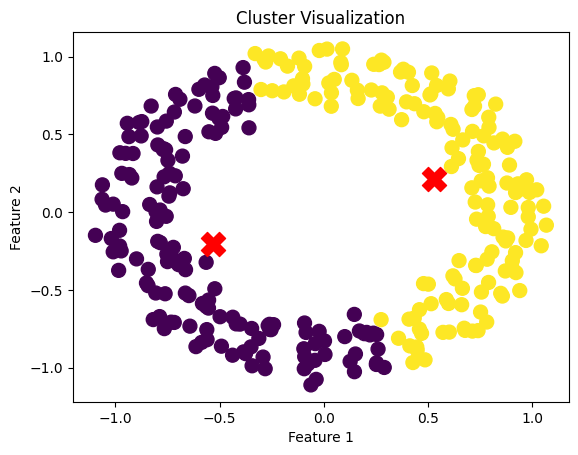

In [8]:
X, y_true = make_circles(n_samples=300, noise=0.05, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42, init='k-means++')
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
# ARI = adjusted_rand_score(y_true, labels)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [9]:
grader.check("q4")

q4 results: All test cases passed!

#### 5. Comparing K-means with Random Initialization and K-means++ Initialization

- In this question you are tasked with **comparing** the k-means clustering using random initialization and k-means++ initialization.
- The function should return the number of iterations and the wcss measure for both techniques. (return it as `n_iter_random`, `n_iter_kpp`, `wcss_random`, `wcss_kpp`)
- `Please use random_state = 42 while defining the KMeans model`


In [18]:
from sklearn.cluster import KMeans

def ans5():
    # Generated synthetic dataset with 5 clusters
    X, y_true = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=42)
    km_random = KMeans(n_clusters=5, random_state=42, init='random')
    km_kpp = KMeans(n_clusters=5, random_state=42, init='k-means++')
    km_random.fit(X)
    km_kpp.fit(X)
    return km_random.n_iter_, km_kpp.n_iter_, km_random.inertia_, km_kpp.inertia_



In [19]:
grader.check("q5")

q5 results: All test cases passed!

#### 6. Determining Optimal K Using Elbow Method
- In this question, run k-means clustering with different `k` values (1-10), and compute the wcss value for each k value.
- Use `kmeans++` as initialization method.
- Compute the `rand scores` and `wcss` values for each `k`
- Return the optimal `k` value along with the `rand scores` and `wcss` values.   **[return in this order k, rand_scores(list), wcss(list)]**
- `Please use random_state = 42 while defining the KMeans model`

In [39]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

def ans6():
    #generate the blob dataset
    X, y_true = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=42)
    wcss, rand_scores = [], []
    optimal = 0
    optimal_k = 0
    
    # Iterate over k values from 1 to 10
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init=k)
        kmeans.fit(X)
        labels = kmeans.labels_
        
        # Compute adjusted rand score
        ARS = adjusted_rand_score(y_true, labels)
        
        # Track the optimal k value based on ARS
        if ARS > optimal:
            optimal = ARS
            optimal_k = k
        
        # Append ARS and WCSS (inertia)
        rand_scores.append(ARS)
        wcss.append(kmeans.inertia_)
    
    return [optimal_k, rand_scores, wcss]

In [37]:
ans6()

[5,
 [0.0,
  0.37406015037593987,
  0.6144345812427634,
  0.7819253438113949,
  0.9974962343264018,
  0.9331872458742863,
  0.8618054180495826,
  0.7867955387242688,
  0.704127565778467,
  0.6748801948339738],
 [57466.397714046856,
  31751.069803539947,
  6145.94331233505,
  1891.9661633713608,
  698.7711305676506,
  649.1801212844955,
  609.4828125578763,
  547.7018230086562,
  503.4521501254576,
  472.11484646249875]]

In [40]:
grader.check("q6")

q6 results: All test cases passed!

#### Submit the completed notebook to Gradescope to view your result!